Linear regression training time: 0.001791 sec
R² (linear): 0.37467360318911636


C:\Users\npano\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


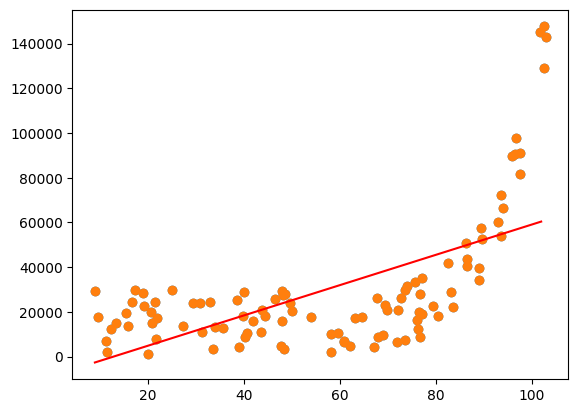

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

data = pd.read_csv("./data/gen_regression.csv")
X = data.x
y = data.y
plt.scatter(X, y)

X = pd.DataFrame(X)

from sklearn.linear_model import LinearRegression

t0 = time.perf_counter()
linear = LinearRegression().fit(X, y)
t1 = time.perf_counter()
print(f"Linear regression training time: {t1-t0:.6f} sec")

xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')
print("R² (linear):", linear.score(X, y))


Poly degree=2 training time: 0.001075 sec
R² (degree=2): 0.7359753787024842


C:\Users\npano\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


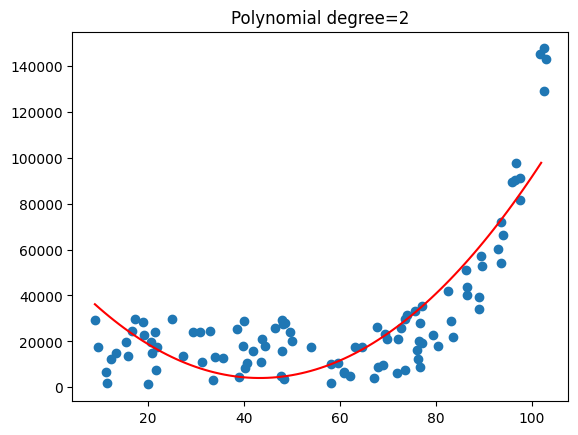

In [3]:
from sklearn.preprocessing import PolynomialFeatures

transformation = PolynomialFeatures(degree=2)
transformation.fit(X)
X_2 = transformation.transform(X)

t0 = time.perf_counter()
poly_2d = LinearRegression().fit(X_2, y)
t1 = time.perf_counter()
print(f"Poly degree=2 training time: {t1-t0:.6f} sec")
print("R² (degree=2):", poly_2d.score(X_2, y))

xx_2d = transformation.transform(pd.DataFrame(xx))
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')
plt.title("Polynomial degree=2")
plt.show()


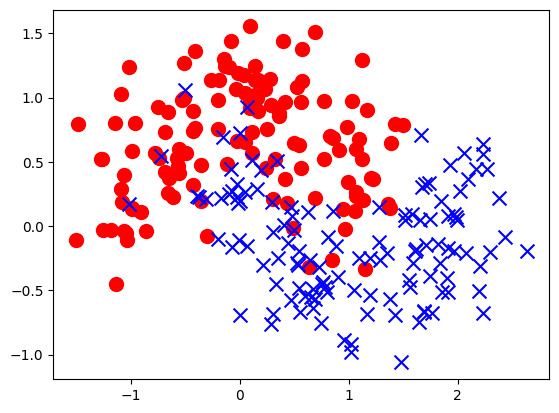

In [4]:
poly_2d.score(X_2, y)

data = pd.read_csv("./data/gen_classification.csv",
                   index_col=0)
y = data.y
X = data.drop(["y"], axis=1)

plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)
plt.show()


Logistic regression training time: 0.004440 sec


C:\Users\npano\AppData\Local\Temp\ipykernel_1104\3902653681.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
C:\Users\npano\AppData\Local\Temp\ipykernel_1104\3902653681.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
C:\Users\npano\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


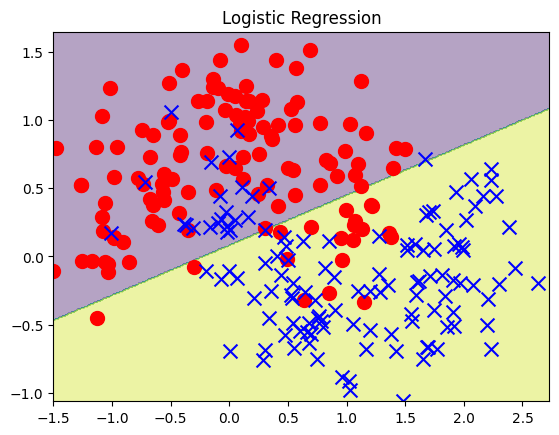

Accuracy (logistic): 0.832


In [5]:
from sklearn.linear_model import LogisticRegression

t0 = time.perf_counter()
logistic = LogisticRegression().fit(X, y)
t1 = time.perf_counter()
print(f"Logistic regression training time: {t1-t0:.6f} sec")

xx_mesh, yy_mesh = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx_mesh.ravel(), yy_mesh.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx_mesh.shape)

plt.contourf(xx_mesh, yy_mesh, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)
plt.title("Logistic Regression")
plt.show()
print("Accuracy (logistic):", logistic.score(X, y))


Logistic Poly degree=3 training time: 0.007494 sec

C:\Users\npano\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


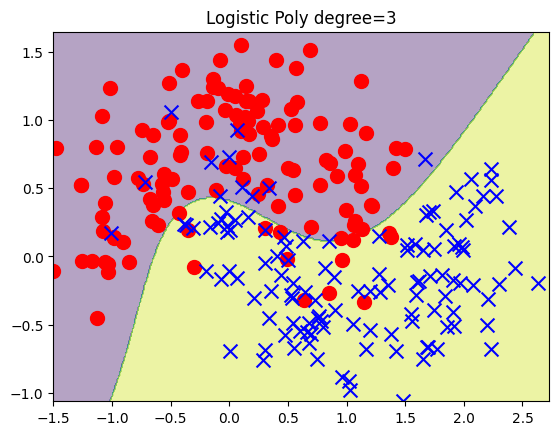

Accuracy (logistic poly=3): 0.9


In [6]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

t0 = time.perf_counter()
class_3 = LogisticRegression().fit(X_3, y)
t1 = time.perf_counter()
print(f"Logistic Poly degree=3 training time: {t1-t0:.6f} sec")

Z = class_3.predict(class_transform.transform(XX)).reshape(xx_mesh.shape)

plt.contourf(xx_mesh, yy_mesh, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)
plt.title("Logistic Poly degree=3")
plt.show()
print("Accuracy (logistic poly=3):", class_3.score(X_3, y))


KC multiple regression training time: 0.009415 sec
R² (KC multiple): 0.6997471890109155


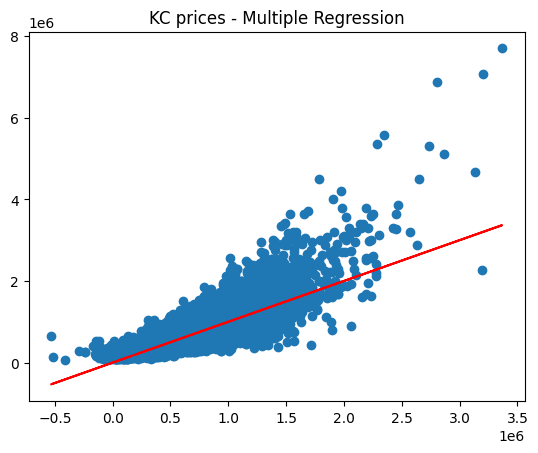

In [7]:
data_kc_prices = pd.read_csv("./data/kc_house_data.csv")
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

t0 = time.perf_counter()
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
t1 = time.perf_counter()
print(f"KC multiple regression training time: {t1-t0:.6f} sec")
print("R² (KC multiple):", reg_kc_multiple.score(X_kc_prices, y_kc_prices))

y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')
plt.title("KC prices - Multiple Regression")
plt.show()


KC Poly degree=3 training time: 2.725818 sec
R² (KC poly=3): 0.8326020796538868


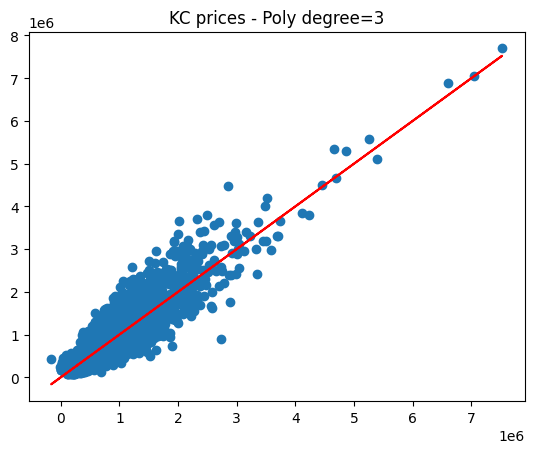

In [10]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)

t0 = time.perf_counter()
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
t1 = time.perf_counter()
print(f"KC Poly degree=3 training time: {t1-t0:.6f} sec")
print("R² (KC poly=3):", reg_poly2_kc.score(X_3_kc_prices, y_kc_prices))

y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')
plt.title("KC prices - Poly degree=3")
plt.show()


C:\Users\npano\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\npano\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\npano\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


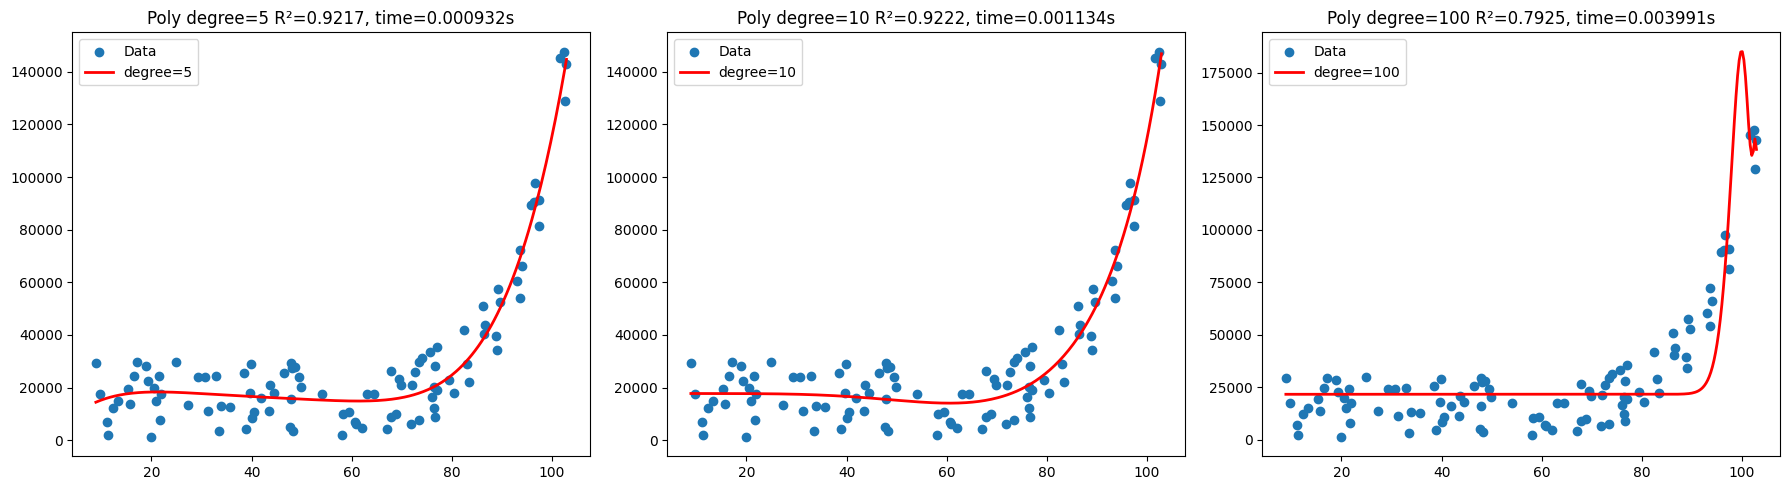

Степень            R²     Время обучения
5            0.921748         0.000932s
10           0.922247         0.001134s
100          0.792462         0.003991s


In [14]:
data_reg = pd.read_csv("./data/gen_regression.csv")
X_reg = pd.DataFrame(data_reg.x)
y_reg = data_reg.y

xx_plot = np.linspace(X_reg.x.min(), X_reg.x.max(), 300)

results = {}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, degree in zip(axes, [5, 10, 100]):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_reg)
    
    t0 = time.perf_counter()
    model = LinearRegression().fit(X_poly, y_reg)
    t1 = time.perf_counter()
    
    train_time = t1 - t0
    r2 = model.score(X_poly, y_reg)
    results[degree] = {'time': train_time, 'R2': r2}
    
    yy_plot = model.predict(poly.transform(pd.DataFrame(xx_plot)))
    
    ax.scatter(X_reg.x, y_reg, label='Data')
    ax.plot(xx_plot, yy_plot, c='r', linewidth=2, label=f'degree={degree}')
    ax.set_title(f'Poly degree={degree} R²={r2:.4f}, time={train_time:.6f}s')
    ax.legend()

plt.tight_layout()
plt.show()

print(f"{'Степень':<10} {'R²':>10} {'Время обучения':>18}")
for deg, res in results.items():
    print(f"{deg:<10} {res['R2']:>10.6f} {res['time']:>16.6f}s")


- Более высокий порядок даёт лучший R² на обучающей выборке,
  но может приводить к переобучению (особенно degree=100).
- Время обучения растёт с увеличением степени полинома,
  так как число признаков растёт: C(n+d, d).